# Final Project
## Model to predict fire duration

### Boilerplate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

### Fire Data

In [2]:
# All data in dataset
all_data = pd.read_csv("Updated Fire Data - First 10K.csv")
display(all_data)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DURATION_HOURS,Precipitation_In_Month,Avg_Temp_In_Month
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,4.500000,3.69,45.6
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,6.750000,0.08,60.2
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,1.050000,0.08,60.2
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,118.000000,0.06,66.8
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,116.000000,0.06,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,9996,b'\x00\x01\xad\x10\x00\x00t\xf7\x9b\xb1Q\xd0^\...,10044,FS-1437373,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,...,41.264167,-123.255000,USFS,CA,93.0,6093.0,Siskiyou County,18.333333,0.06,76.6
9957,9997,b'\x00\x01\xad\x10\x00\x00\xf4\xa5\xc8kOB^\xc0...,10045,FS-1437374,FED,FS-FIRESTAT,FS,USORFWF,Fremont-Winema National Forest,602,...,42.336944,-121.036111,USFS,OR,35.0,41035.0,Klamath County,0.250000,0.71,66.8
9958,9998,b'\x00\x01\xad\x10\x00\x00\xb067\xed|\x8e^\xc0...,10046,FS-1437375,FED,FS-FIRESTAT,FS,USORUPF,Umpqua National Forest,615,...,43.230833,-122.226389,USFS,OR,19.0,41019.0,Douglas County,67.283333,0.20,65.1
9959,9999,b'\x00\x01\xad\x10\x00\x00 \x11\x08\xdeJ\xd2^\...,10047,FS-1437376,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,...,41.137778,-123.285833,USFS,CA,93.0,6093.0,Siskiyou County,73.500000,0.06,76.6


### Preprocessing Data

Text(0.5, 1.0, 'Boxplot of fire duration in hours before preprocessing')

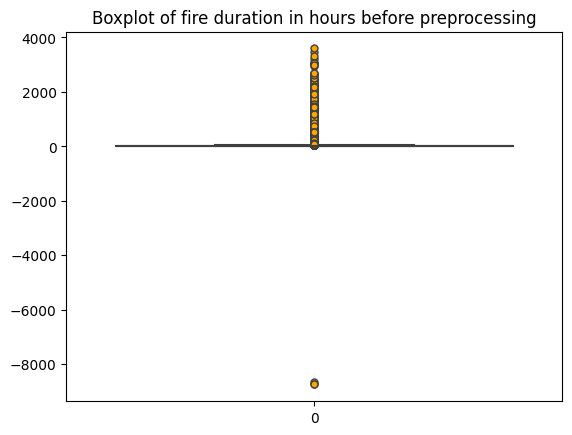

In [3]:
# Select only the data we need for the regression model
data = pd.DataFrame(all_data, columns = ['DURATION_HOURS', 'Precipitation_In_Month', 'Avg_Temp_In_Month', 'STATE'])
# Boxplot to show fire duration
sns.boxplot(data.DURATION_HOURS, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Boxplot of fire duration in hours before preprocessing')

In [4]:
# Find outliers in fire duration
summary_statistics = data['DURATION_HOURS'].describe()
print(summary_statistics)

count    9924.000000
mean       54.996285
std       303.503018
min     -8743.283333
25%         1.666667
50%         4.500000
75%        22.250000
max      3593.900000
Name: DURATION_HOURS, dtype: float64


In [5]:
# Remove outliers
min_value = 0
max_value = 22.25
filter_hours = (data['DURATION_HOURS'] >= min_value) & (data['DURATION_HOURS'] <= max_value)
filtered_df = data[filter_hours]
df = filtered_df

# Drop Nan values
df = df.dropna()

Text(0.5, 1.0, 'Boxplot of fire duration in hours after preprocessing')

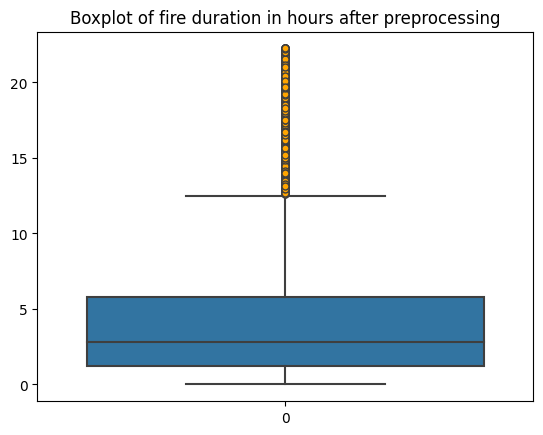

In [6]:
# Boxplot to show duration hours after data was filtered
sns.boxplot(df.DURATION_HOURS, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Boxplot of fire duration in hours after preprocessing')

### Creating Linear Regression Model

In [7]:
# Encoding the 'STATE' column with one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_states = encoder.fit_transform(df[['STATE']])
encoded_states_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['STATE']))

# Preparing the features DataFrame
numerical_features = df[['Precipitation_In_Month', 'Avg_Temp_In_Month']].reset_index(drop=True)
features_final = pd.concat([numerical_features, encoded_states_df], axis=1)

# Preparing the target variable
target = df['DURATION_HOURS']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, target, test_size = 0.2, random_state = 16)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

### Results of Linear Regrssion Model

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming y_test are the actual values and y_pred are the model predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) Score: {r2}")

Mean Squared Error (MSE): 29.191694266434713
Root Mean Squared Error (RMSE): 5.402933857307039
Mean Absolute Error (MAE): 3.9591167489271912
R-squared (R²) Score: 0.0965259933017889


### Formula to predict fire duration

In [9]:
state_abbreviation_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia"
}

def abbrev_to_fullname(abbrev):
    return state_abbreviation_to_name.get(abbrev.upper(), "Unknown State")



def predict_fire_duration(precipitation, avg_temp, state):
    # Print statement if there is no data on desired state
    if state not in encoder.categories_[0]:
        print("No data on", abbrev_to_fullname(state) + ".\n")
        return
        
    # Create a DataFrame for the state with the correct column name 'STATE'
    state_df = pd.DataFrame([state], columns=['STATE'])
    
    # Encode the provided state using the global encoder
    state_encoded = encoder.transform(state_df)
    
    # Create a DataFrame for the numerical features
    features_df = pd.DataFrame({'Precipitation_In_Month': [precipitation], 'Avg_Temp_In_Month': [avg_temp]})
    
    # Combine the numerical features with the encoded state features
    # Ensure that we correctly name the columns as expected by the model
    encoded_state_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out())
    full_features_df = pd.concat([features_df, encoded_state_df], axis=1)
    
    # Predict fire duration using the combined features DataFrame
    predicted_duration = model.predict(full_features_df)
    pred = predicted_duration[0]
    pred = round(pred, 2)
    
    print("If there is a fire in", abbrev_to_fullname(state),
          "during a month that has an average precipitation of", precipitation,
          "inches,\nand has an average temperature of", avg_temp,
          "degrees farenheit,\nthen we can predict that the fire will last about", pred, "hours.\n")    

### Testing the Model

In [16]:
predict_fire_duration(0.5, 75, 'CA')
predict_fire_duration(0.2, 99, 'TX')
predict_fire_duration(2, 60, 'OR')
predict_fire_duration(0.7, 83, 'HI')

If there is a fire in California during a month that has an average precipitation of 0.5 inches,
and has an average temperature of 75 degrees farenheit,
then we can predict that the fire will last about 3.78 hours.

If there is a fire in Texas during a month that has an average precipitation of 0.2 inches,
and has an average temperature of 99 degrees farenheit,
then we can predict that the fire will last about 5.72 hours.

If there is a fire in Oregon during a month that has an average precipitation of 2 inches,
and has an average temperature of 60 degrees farenheit,
then we can predict that the fire will last about 5.94 hours.

No data on Hawaii.

